# PyShop Session 2
***
This session focuses on some of the most useful modules, including NumPy, SciPy, Matplotlib, and Pandas.  All of the features discussed will be introduced using basic examples.  The main topics covered will be the following:

  * NumPy arrays and their syntax.
  * Integration.
  * Root finding.
  * DataFrames.
  * Simple plots.
  * Other topics to be added later.

This session is simply meant to introduce the main features of the big four modules and give students time to become more familar with simple Python programs.  By the end of this session you should be comfortable enough with the basic Python interface to know what modules you need to import to do basic calculation, data entry, and data visualization.

## Why Packages?
Python is built to be a modular programming environment.  When you load the Python interpreter, you load the basic functionality to run programs and work with the native data types.  You can easily import more functionality from modules and packages.  This makes running Python light compared to other mathematical software, such as MatLab.  Additionally, anyone can develop and publish packages through the Python Package Index (PyPI).  Although there are thousands of packages listed, you will find yourself returning to a reliable set for your own work.  Of these faithful companions, everyone will at some point need to work with NumPy, SciPy, MatPlotLib, and Pandas.  It is because of this that we'll spend a session working on just these packages and introducing their basic functionality.

## NumPy
NumPy is, above all, a wrapper for the ndarray object.  This type of object has several nice features.  First, because all of the elements of an array must be of the same type, the size of the array is predictable.  Second, NumPy comes with pre-compiled C code to run vectorized functions that speed up your code.  Third, the indexing syntax for an array is concise and clear.  Similarly, NumPy can handle arrays of different dimensions through its native broadcasting, making code easier to read and write.  Let's look at each of these points individually through some examples.

### Creating Arrays
Creating arrays in NumPy is easy.  You can create an array from other data types, or through built in functions:

In [ ]:
import numpy as np  #This is the traditional way to import NumPy

a = np.array([[1.,0],[0,1]])  #Create an identity matrix by hand NOTE: What are the data types of entries?
b = np.eye(2)  # Creat an identity matrix using built in funciton

print(a)
print(b)

Notice in the above code that `a` was given both float and integer information, but the resulting array was filled with only floats.  This can be overridden by specifying the data type as `object`, but is not recommended since NumPy plays best with homogeneous arrays:

In [ ]:
c = np.array([[1.,0],[0,1]]).astype(object)
c[0, 0] = int(1)
print(c)

It is possible to create arrays of very high dimension.  However, you should be careful of memory usage.  An array is stored in memory as a continuous block and the elements take up as much memory as they would have alone.  So, for example, a float element is around 8 bytes.  For an array of 3 dimensions with 1000 points in each direction, that is 1000^3*8 / 10^9 = 8 gigabytes of ram just to store the thing!

### Array Indexing
Array indexing is done similarly to lists.  Indices begin at zero.  However, the syntax is slightly different and a little less cumbersome when using arrays:

In [ ]:
a = np.random.rand(50, 50)  #Generate a 50x50 array of random numbers from uni[0,1]
print(a.shape)

#You can reference single entries in an array
print(a[0, 0])

#It is also possible to slice arrays as with lists
print(a[:, 0])

#Assignment to an array entry is the same
a[0, 0] = 0.0
print(a[0, 0])

It is important to be careful when trying to create a copy of an array.  When you simply assign to an array using `=`, you create what is called a "view" of the array.  A view is simply a pointer to the same block of memory.  This reduces the amount of memory you use, but the two names now point to the same object in memory, so changing one changes the other.  If you really need a copy, you should explicitly creat one by either slicing or using the `.copy()` method:

In [ ]:
a = np.eye(2)
b = a
print(a)
print(b)
print("\n")

a[0, 0] = 0
print(a)
print(b)
print("\n")

a = np.eye(2)
b[:] = a
c = a.copy()
print(a)
print(b)
print(c)
print("\n")

a[0, 0] = 0
print(a)
print(b)
print(c)
print("\n")

### Broadcasting
When you give NumPy an operation to do over two arrays that do not have matching dimensions, NumPy automatically "broadcasts" the operation.  This action allows you to carry out scalar multiplication, kronecker products, and more complex matrix and array arithmetic quickly and with simple syntax.  We'll cover this in more detail next week, but for now we can look at some examples:

In [ ]:
a = np.eye(2)
b = np.eye(2)
c = 2

#Multiplicaiton is done elementwise
print(a * b)

In [ ]:
#Scalar multiplcation is broadcast
print(a * c)

In [ ]:
#So are addition, both vector and scalar
d = np.array([1., 1.])
print(a + d)
print(a + c)

In [ ]:
# Some arrays to broadcast
d = np.array([1, 2])
e = np.vstack((a, np.zeros(2)))
f = np.array([[1, 2], [3, 4]])

In [ ]:
# Required that all of the dimensions either match or equal one
print(e.shape)
print(e)
print(d.shape)
print(d)
print(d + e)
print(e + a)

In [ ]:
# A one d array is neither column nor row
print(d.shape)
print(d == d.T)

In [ ]:
# This means the broadcasting rule seems ambiguous
print(a + d)

In [ ]:
# Broadcasting rules move along the first matching axis FROM THE RIGHT
print(f.shape)
print(f)
print(d.shape)
print(d)
print(f + d)
print(f + d.T)

In [ ]:
# You can change this by adding a new axis
# This helps to be specific about shape
print(d[:, np.newaxis].shape)
print(f + d[:, np.newaxis])

These ideas apply in higher dimension and with all types of arithmetic operations, as well as some built in functions.

### Why do I care?
NumPy is much faster than the native Python data types.  Because Python is an interpreted language, the programs must be parsed every time they are run.  Because of this, it does not benefit from the speed of being a compiled language.  NumPy gets around this by having pre-compiled functionality.  Let's see how much faster it is with an example:

In [ ]:
import time

length = 10

a = [i for i in range(0, length)]
b = [i for i in range(0, length)]
c = []

t0 = time.time()

for i in range(len(a)):
  c.append(a[i]*b[i])

t1 = time.time()
print("Process executed in : %s : seconds." %(t1 - t0))

In [ ]:
a = np.arange(0, length)
b = np.arange(0, length)

t0 = time.time()

C = a * b

t1 = time.time()
print("Process executed in : %s : seconds." %(t1 - t0))

I encourage you to change the number of elements in the two calculations to see the difference!

### Is that it?!
No.  Calm down.  We've got a long ways to go and next week we'll see more of NumPy.  If you can't wait, though, check out the <a href="http://docs.scipy.org/doc/numpy/reference/index.html" target="_blank">documentaiton</a>.  In particular you might find interesting the linear algebra, matlib, random numbers, sorting, or fourier transform libraries!  Ok, maybe not the last one, but we can always hope...

## SciPy
SciPy is a bundle of open source software for Python, while the SciPy library is a fundamental set of numerical algorithms.  It's only thanks to this library that Python is able to compete against MatLab or R.  However, most of its functionality will go completely unnoticed to you.  When you use statistical packages or plotting or many other packages, they will call SciPy to do the heavy lifting.  For economists (as best as I can tell) the most used subpackages will be `integrate`, `interpolate`, `optimize`, `sparse`, and `stats`.  These packages cover a massive amount of very comlex algorithms, so we'll only cover a tiny fraction of it today and a little more next week.

### Integration
A typical problem in continuous time economics and, more generally, in econometrics is to solve an integral.  SciPy provides a package called `scipy.integrate`.  You should check out the <a href="http://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate" target="_blank">documentation</a> for more details.

For general integration, use the `quad` function.  It's quite opaque what quadrature this method is using as its standard, but the precision is good.  The function is slow, but precise.  Here's an example:

In [ ]:
import scipy.integrate

scipy.integrate.quad(lambda x: x**2, 0.0, 10.0)

The output of `quad` is a tuple containing the numerical solution and the upper bound on the error.  We know the exact solution to this problem, so we can compare the two:

$$\int_0^{10} x^2 dx = \left[ \frac{1}{3} x^3 \right]_0^{10} = \frac{1000}{3}$$

Indeed, given the smoothness of the problem the error estimate is quite close to the true error.

If you'd like to do higher order integration, SciPy offers `dblquad`, `tplquad`, or `nquad`.  Using these functions you can integrate up to an arbitrary number of dimensions, but you'll have to dig into that on your own if you need these functions.  Alongside these quadrature rules, there are also `numpy.trapz` and `scipy.integrate.simps` for trapezoid rule and simpson's rule integration.

Finally, SciPy has an ODE solver called `odeint`.  This can integrate first order vector differential equations.  Since differential equation problems are quite general and involved, it suffices to say that since this is a vector solver, it is possible to solve higher order ODE's using this function.  If you are interested, check out <a href="http://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html#ordinary-differential-equations-odeint" target="_blank">the docs</a>.

### Optimization
(Note: this is just a reproduction of the lecture)
SciPy offers several algorithms for optimization.  Since this is not a course on numerical methods, I'll just list a few here and we can look at the soluitons they give.

Methods:

1. "Downhill simplex method".  Generates a simplex of dimension n+1 and then uses a simple algorithm (similar to a bisection algorithm) to find local optima.

2. "Broyden-Fletcher-Goldfarb-Shanno Algorithm".  Considered a "quasi-newton" method.  A newton step would calculate the hessian directly, where quasi-newton methods approximate it in some way.  

3. "Powell's Conjugate Direction Method". A sort of combination of steps in the taxi-cab method.  Instead of searching only along a single vecor, take a linear combination of the gradients.

4. "Conjugate Gradient Method".  Most useful for sparse, linear systems.  You'll notice here it is unsuccessful.

We'll study the rosenbrock banana function, a typical problem used for timing/testing a numerical method.  It is very flat in part of the domain and very steep in others.  Additionally its minimum is known.

$$
f(x, y) = (a - x)^2 + b(y - x)^2
$$

whose minimum is achieved at $(x, y) = (a, a^2)$.

In [ ]:
import scipy.optimize

def rosenbrock(x, a, b):
    return (a - x[0])**2 + b*(x[1] - x[0]**2)**2

a = 1.
b = 100.

x0 = np.array([2., 3.])

t0 = time.time()
res = scipy.optimize.minimize(rosenbrock, x0, args=(a, b), method='Nelder-Mead')
t1 = time.time()
print("\nProcess executed in : %s : seconds.\n" %(t1 - t0))
print(res)

t0 = time.time()
res = scipy.optimize.minimize(rosenbrock, x0, args=(a, b), method='BFGS')
t1 = time.time()
print("\nProcess executed in : %s : seconds.\n" %(t1 - t0))
print(res)

t0 = time.time()
res = scipy.optimize.minimize(rosenbrock, x0, args=(a, b), method='Powell')
t1 = time.time()
print("\nProcess executed in : %s : seconds. \n" %(t1 - t0))
print(res)

t0 = time.time()
res = scipy.optimize.minimize(rosenbrock, x0, args=(a, b), method='CG')
t1 = time.time()
print("\nProcess executed in : %s : seconds. \n" %(t1 - t0))
print(res)

These different methods give the same result, except the conjugate gradient method which fails given the flat region of the banana funciton. 

### Root Finding
(Note: this is simply a reproduction from the course)
Similar to minimization, SciPy offers several methods for root finding.  Again, I simply list several here:

Methods:

1. "Hybrid".  From MINPACK, essentially a modified Powell method.

2. "Broyden's Method".  A quasi-newton method for multidimensional root finding.  Calculate the jacobian only once, then do an update each iteration.

3. "Anderson Mixing".  A quasi-newton method.  Approximate the jacobian by the "best" solution in the space spanned by the last M vectors... whatever that means!

4. "Linear Mixing".  Similar to Anderson method.

5. "Krylov Methods".  Approximate the jacobian by a spanning basis of the krylov space.  Very neat.

Each of these methods has its advantages.  To look at multidimensional root finding, we'll treat the banana functions two terms as seperate functions and see if we get the same soluiton.

In [ ]:
def f(x, a, b):
    return np.array([a*(1 - x[0]), b*(x[1] - x[0]**2)**2])

a = 1.
b = 100.
x0 = np.array([10., 2.])

t0 = time.time()
sol = scipy.optimize.root(f, x0, args=(a, b), method='hybr')
t1 = time.time()
print("\nProcess executed in : %s : seconds. \n" %(t1 - t0))
print(sol)

t0 = time.time()
sol = scipy.optimize.root(f, x0, args=(a, b), method='broyden1')
t1 = time.time()
print("\nProcess executed in : %s : seconds. \n" %(t1 - t0))
print(sol)

t0 = time.time()
sol = scipy.optimize.root(f, x0, args=(a, b), method='anderson')
t1 = time.time()
print("\nProcess executed in : %s : seconds. \n" %(t1 - t0))
print(sol)

t0 = time.time()
sol = scipy.optimize.root(f, x0, args=(a, b), method='linearmixing')
t1 = time.time()
print("\nProcess executed in : %s : seconds. \n" %(t1 - t0))
print(sol)

t0 = time.time()
sol = scipy.optimize.root(f, x0, args=(a, b), method='krylov')
t1 = time.time()
print("\nProcess executed in : %s : seconds. \n" %(t1 - t0))
print(sol)

Notice that only the hybrid method converged and indeed to the same solution.  This is because of the flattness of the function and the fact that the rest of the methods are based strongly on the jacobian or its approximation.


## MatPlotLib
Orinially based on MATLAB, the matplotlib is a 2D python plotting library.  However, beyond its MATLAB origins, matplotlib is very object oriented and allows one to fully customize the plotting experience.  Matplotlib is made up of three parts: the Pylab Interfacce, the matplotlib frontend, and the backend.  The Pylab Interface is how the user inputs information into matplotlib and works much the same as MATLAB.  The frontend does all of the heavy lifting, generating the plot data.  Finally, the backend renders that data as a plot.

### Basic 2D Plotting
Given $(x, y)$ coordinates, you can create a plot in a snap:

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(0, 1, 0.01)
y = x**2*(1 - x)
plt.plot(x, y)
plt.show()

Now that you have a sweet plot, how do you change its characteristics.  Setting aside style for now, you can change labels, titles, etc. with some simple commands:

In [ ]:
x = np.arange(0, 1, 0.01)
f = lambda x: x**2*(1 - x)
y = f(x)
plt.plot(x, y)

#Add axis labels
plt.xlabel('Candy (in kg)')
plt.ylabel('Happiness')

#Add title
plt.title("Happiness of Children as a Function\n"
          + " of Halloween Candy Consumed")

#Add emphasis to important points
points = np.array([0.1, 0.5, 0.7])
plt.plot(points, f(points), 'ro')

#Add a label and legend to the points
plt.plot(points, f(points), 'o', label='Fights With Sister Observed')
plt.legend()

#But the legend is poorly placed, so move it to a better spot
plt.legend(loc=0)

plt.show()

The different line styles, marker styles, color pallettes, etc., are all highly customizable. In a couple of weeks we'll go over how you can set up matplotlib to load with the style you prefer, but for now we'll just stick with the standard.

One of the great things about matplotlib is object oriented programming.  By that I mean that you can create objects, like arrays or lists, that contain figures and plots.  The way of doing this is to define a **figure** object and an **axes** object.  In fact, `pylot` does this automatically so that you don't have to worry about it.  In order to get used to this idea, I encourage you to avoid using `pyplot`, but instead to define your own objects using `subplots`.

A figure object describes the plot window and all of its properties.  An axes object is contained within the figure and describes a single plot.  So, if you would like a figure with three subplots you would have one figure object and three axes objects.  We'll see how this works in more detail later, but to get an idea, here's a subplot:

In [ ]:
x = np.arange(0, 10, 0.1)
f = lambda x: np.cos(x)
g = lambda x: np.sin(x)

#Create the figure and axes objects. sharex and sharey allow them to share axes
fig, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True)

#Plot on the first axes object. Notice, you can plot several times on the same object
ax1.plot(x, f(x))
ax1.plot(x, g(x))

#Plot on the second axes object
ax2.plot(x, f(x)*g(x))

plt.show()

Finally, you can easily create 3D plots using an Axes3D object.  Let's plot a CRRA utility function over some positive consumption bundles for periods 1 and 2:

$$U(c_1, c_2) = \frac{c_1^{1-\gamma}}{1-\gamma} + \beta \frac{c_2^{1-\gamma}}{1-\gamma}$$


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def U(c1, c2, beta, gamma):
    return c1**(1 - gamma)/(1 - gamma) + beta*c2**(1 - gamma)/(1 - gamma)

beta = 0.98
gamma = 2.0

fig = plt.figure()
ax = fig.gca(projection="3d")

low = 1.0
high = 10.0

c1 = np.arange(low, high, 0.1)
c2 = np.arange(low, high, 0.1)

C1, C2 = np.meshgrid(c1, c2)

utils = U(C1, C2, beta, gamma)

ax.plot_surface(C1, C2, utils, alpha=0.3)
cset = ax.contour(C1, C2, utils, zdir='z', offset=-2.0)
#cset = ax.contour(C1, C2, utils, zdir='y', offset=10.0)
#cset = ax.contour(C1, C2, utils, zdir='x', offset=1.0)

plt.show()

**NOTE:** If you would like to interact with any of the graphs, you can run the following command to turn off inlline plotting.  If you would like to turn inline back on, run the command at the top of these notes.

In [ ]:
# NOTE: This fails on my computer because of faulty build
%matplotlib qt

There are other, newer Python plotting packages, like Plotly (https://plot.ly/python/) or Seaborn (http://stanford.edu/~mwaskom/software/seaborn/), both of which produce really slick graphics.  However, if you are just looking for simple plots to visualize your graphics, I would start with matplotlib.

## Pandas
The last of the big packages that we'll cover is the Pandas package, which is used for data analysis.  The package contains data types for time series, panels, sets, but Pandas' most important feature is the DataFrame.  DataFrames allow you to handle data in a matrix form, but allowing columns to be of heterogeneous types.  Additionally, the DataFrame contains an index, which may or may not be heirarchical, allowing you to control your data over multiple indices.

Let's load some data into a DataFrame from the internet:

In [7]:
import pandas as pd

DF = pd.read_csv('http://people.stern.nyu.edu/wgreene/Econometrics/grunfeld.csv')

In [2]:
#Print the first few rows of the dataset
DF.head()

,FIRM,YEAR,I,F,C
0,1,1935,317.6,3078.5,2.8
1,1,1936,391.8,4661.7,52.6
2,1,1937,410.6,5387.1,156.9
3,1,1938,257.7,2792.2,209.2
4,1,1939,330.8,4313.2,203.4


There are many other data I/O commands (http://pandas.pydata.org/pandas-docs/stable/io.html) that you should check out.  There are also packages to read old ASCII files floating about, but this doesn't seem to be high on anyone's priority list.

Once you have your data frame, you can do some work to analyze its shape and calculate some descriptive statistics:

In [ ]:
DF.shape

In [ ]:
DF.describe()

Selecting a column in a DF is done by referencing the column 'key', similar to a dictionary.

In [8]:
#Personally, I dislike capital letters in the column names, but it's easy to fix!
DF.columns = DF.columns.str.lower()

#Fun fact: There happens to be a mistake in the column names in this file:
print(DF.columns)

#Notice the extra space after 'c'.  We can remove this.
DF = DF.rename(columns = {DF.columns[-1]:DF.columns[-1][:-1]})
print(DF.columns)

DF['firm']

Index(['firm', 'year', 'i', 'f', 'c '], dtype='object')
Index(['firm', 'year', 'i', 'f', 'c'], dtype='object')


0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      2
21      2
22      2
23      2
24      2
25      2
26      2
27      2
28      2
29      2
       ..
170     9
171     9
172     9
173     9
174     9
175     9
176     9
177     9
178     9
179     9
180    10
181    10
182    10
183    10
184    10
185    10
186    10
187    10
188    10
189    10
190    10
191    10
192    10
193    10
194    10
195    10
196    10
197    10
198    10
199    10
Name: firm, dtype: int64

The column attribute stores a list of column names.  It is possible to redefine one or all of the column names by referencing this list.  However, it is an `Index`, so Pandas won't be happy if you try to rename it directly.  To do this, use the `.rename` method.

It's also very easy to plot a column.

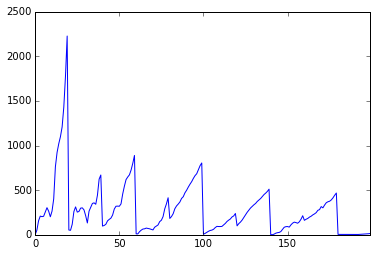

In [9]:
%matplotlib inline
DF['c'].plot()

However, this plot is for all of our data.  Since this is a panel, we get all of the firms plotted on the same line.  To get around this we need to specify the indices.  To do that, we will use what's called a "heirarchical index".  We will index our data first by firm and then by year.  Let's see how that's done:

In [10]:
#Just as an example, let's create a data frame with a single index
DF_test = DF.set_index('year')
DF_test.head()

,firm,i,f,c
year,,,,
1935,1,317.6,3078.5,2.8
1936,1,391.8,4661.7,52.6
1937,1,410.6,5387.1,156.9
1938,1,257.7,2792.2,209.2
1939,1,330.8,4313.2,203.4


You'll notice that the year has been moved to the left side of the table.  It now acts as the index for referencing data in the rows.

In [5]:
DF_test.loc[1935]

,firm,i,f,c
year,,,,
1935,1,317.60,3078.50,2.8
1935,2,209.90,1362.40,53.8
1935,3,33.10,1170.60,97.8
1935,4,40.29,417.50,10.5
1935,5,39.68,157.70,183.2
1935,6,20.36,197.00,6.5
1935,7,24.43,138.00,100.2
1935,8,12.93,191.50,1.8
1935,9,26.63,290.60,162.0


In [6]:
DF.c.plot()

/home/pi/env/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


But you'll also notice that there are 10 firms for every year.  This is not data but another index, so we could use this as part of our heirarchical index.  It's as easy as supplying a list instead of a single string to the `.set_index` method.

In [11]:
DF_heir = DF.set_index(['year', 'firm'])
DF_heir.head()

,,i,f,c
year,firm,,,
1935,1,317.6,3078.5,2.8
1936,1,391.8,4661.7,52.6
1937,1,410.6,5387.1,156.9
1938,1,257.7,2792.2,209.2
1939,1,330.8,4313.2,203.4


Now you can reference data by firm and by year.

In [12]:
DF_heir.loc[1935].loc[1]

i     317.6
f    3078.5
c       2.8
Name: 1, dtype: float64

A useful method with DataFrames is `.groupby`.  This will allow you to group the DataFrame by any column or index you'd like.  It generates a groupby object, over which you can iterate.  It even makes plotting by group a breeze.  Check it out!

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 7))
years = list(DF_heir.index.levels[0])
DF_heir['c'].groupby(level=1).plot(ax=ax)
ax.set_xticklabels(years)
ax.set_title('Candy Purchases by Firm')
ax.set_xlabel('Year')

Easy peazy, right?! Just you wait, Henry Higgins.  

Lastly, Pandas comes with a pivot table function, which can automate most of this for you.  Let's try and create the same `DF_heir` using a pivot table.

In [ ]:
pivot = pd.pivot_table(DF, index=['year', 'firm'])
pivot.head()

Indeed, we get the same thing, just as a different data type.

## Conclusion
In these notes we've looked at some basic functionality of NumPy, SciPy, matplotlib, and Pandas.  We've seen how to create and reference arrays, a tiny bit of integration and optimization, how to create and edit simple 2D plots, and how to use DataFrames to manage data and do a bit of analysis.  This is the end of our basic introduction to Python and I hope you've learned a lot.  In the next three sessions we will dive more deeply into the things we've already seen and work on some more complex problems.